In [1]:
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
%store -r date_list
%store -r cpi_list
%store -r ppi_list
%store -r unemployed_ratio_list
%store -r update_sp500

In [3]:
case_sp500 = pd.DataFrame()
case_sp500['date'] = date_list
case_sp500['cpi'] = cpi_list
case_sp500['ppi'] = ppi_list
case_sp500['unemployment_ratio'] = unemployed_ratio_list
case_sp500_update = pd.concat([case_sp500, update_sp500], axis=1).dropna()
case_sp500_update['date'] = pd.to_datetime(case_sp500_update['date'])
case_sp500_update = case_sp500_update.set_index('date')
find_sp500_case = case_sp500_update.resample('M').mean()

In [4]:
train=find_sp500_case[(find_sp500_case.index.get_level_values(0) <= '2015-08-31')]
test=find_sp500_case[(find_sp500_case.index.get_level_values(0) > '2015-08-31')]
model_sp500_without_variable = pm.auto_arima(train['Price'], 
                        D=1, 
                        test='adf',
                        m=12,
                        error_action='ignore',  
                        suppress_warnings=True, stepwise=True, trace=True, seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=2.78 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2001.122, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1959.801, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1925.197, Time=0.32 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2002.654, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1927.160, Time=0.80 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1927.160, Time=9.80 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1959.908, Time=0.72 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=5.80 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1927.188, Time=0.80 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1925.200, Time=0.65 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=1.81 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=i

In [5]:
model_sp500_without_variable.fit(train['Price'])
model_sp500_without_variable.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -959.599
Date:                            Fri, 10 Mar 2023   AIC                           1925.197
Time:                                    14:55:14   BIC                           1934.692
Sample:                                         0   HQIC                          1929.048
                                            - 188                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0548      0.072      0.759      0.448      -0.087       0.196
ma.S.L12      -0.8819      0.076    -11.540      0.000      -1.032      -0.732
sigma2      3062.3799    306.240     10.000      0.000    2462.161    3662.599
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                15.88
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.56
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
len(test)

83

0.2292588697981979

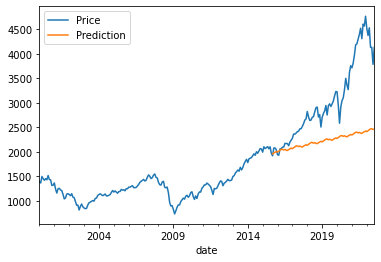

In [7]:
forecast=model_sp500_without_variable.predict(n_periods=len(test), return_conf_int=True)
arima_df_1 = pd.DataFrame(forecast[0], index = test.index, columns=['Prediction'])
pd.concat([find_sp500_case['Price'],arima_df_1],axis=1).plot()
mean_absolute_percentage_error(test['Price'], arima_df_1['Prediction'])

In [9]:
data_arima_no_variable = arima_df_1.reset_index()
%store data_arima_no_variable

Stored 'data_arima_no_variable' (DataFrame)
